<div class="alert alert-info">
    <h1 align="center">Linear Regression</h1> 
    <h3 align="center"> Machine Learning Course (Fall 2020)</h3>
    <h5 align="center">Mahmoud Ghazi [ML2020]</h5>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np

#### Predict the price of house(y) according to independance variable(x) is a simple problem of linear regression
* dependant variable(y) is continuous ...

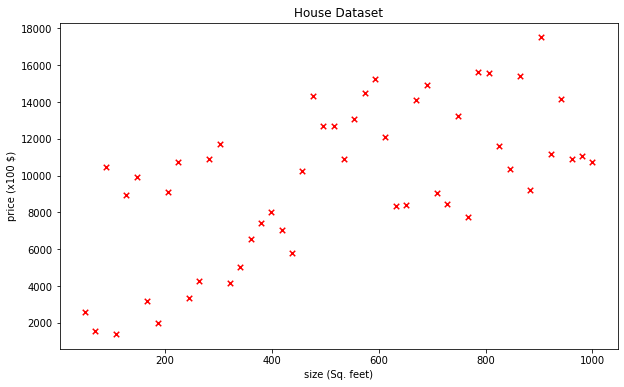

In [2]:
# rand(d0, d1, …, dn)	Random values in a given shape.
# randn(d0, d1, …, dn)	Return a sample (or samples) from the “standard normal” distribution.
# randint(low[, high, size, dtype])	Return random integers from low (inclusive) to high (exclusive).
# random_integers(low[, high, size])	Random integers of type np.int between low and high, inclusive.
# random_sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# random([size])	Return random floats in the half-open interval [0.0, 1.0).
# ranf([size])	Return random floats in the half-open interval [0.0, 1.0).
# sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# choice(a[, size, replace, p])	Generates a random sample from a given 1-D array
# bytes(length)	Return random bytes.
num = 50                                                              
x = np.linspace(50,1000,num=num)
y = 10*x  +  np.random.uniform(low=0, high=10000, size=(num,))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, c='r', marker='x')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.show()

#### The simplest hypothesis for linear regression

## $$ h_\theta(x) = \theta_0 + \theta_1 x $$
* $ \theta_0 , \theta_1 $ are parameters which $ \theta_0 $ is intercept and $ \theta_1 $ is slope 
*we suppose x and y by random function

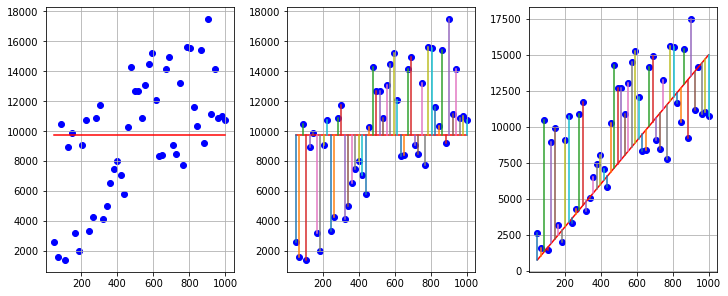

In [3]:
y_1 = np.ones_like(y) * y.mean()

fig = plt.figure(constrained_layout=True, figsize=(10,4))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0,0])
ax1 = fig.gca()
ax1.scatter(x,y,c='b');
ax1.plot(x,  y_1, color='r');
plt.grid()

ax2 = fig.add_subplot(grid[0,-2])
ax2.scatter(x,y,c='b');
ax2.plot(x,  y_1, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_1[i]))
plt.grid()

y_2 = 15*x
ax3 = fig.add_subplot(grid[0,-1])
ax3.scatter(x,y,c='b');
ax3.plot(x,  y_2, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_2[i]))
plt.grid()

#### Error for one sample is the distance between each dot to line:    $ h_\theta(x) - y_i $
<font color="blue">  <b>COST FUNCTION</b> (Sumation of all squared errors) : </font>
### $$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2 $$

#### Lets draw the cost function

if  $ \theta_0=0 $

Then we have : $ h_\theta(x) = \theta_1 x_i $

if we calculate the cost function $\frac{1}{2}\sum_{i=1}^n(\theta_1 x_i  - y_i)^2 $ for different $\theta_1 $ and plot it, we have:

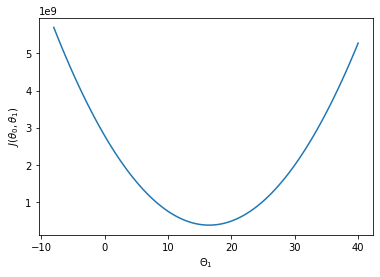

In [4]:
# Randomly determine theta_1
j=[]
theta_1=[]
theta = np.linspace(-8,40,num=100)
for t in theta:
    a = 0.5*np.sum((t*x - y)**2)
    j.append(a)
    theta_1.append(t)

plt.plot(theta_1,j)
plt.xlabel(r'$\Theta_1$')
plt.ylabel(r'$J(\theta_0,\theta_1)$');

In [5]:
# calculate hypothesis
def h(tet0, tet1, x):  
    return tet0 + tet1 * x

#calculate mean squared error
def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

### Normalization

In [6]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
# print(xn)

## Goal
#### Above figure turn to a 3-dimension plate if $\theta_0$ was determined (the figure of 3d plate will be shown later in this project). In order to find a best hypothesis(line) we should minimize the cost function.
#### for minimizing the cost function we should find the best parameters

### $$minimize  J(\theta_0 , \theta_1)$$

## <font color='blue'>Gradient descent</font>
After Randomly determine $\theta_0 , \theta_1$  and calculate cost function, Now we should find a direction to move and minimize this function. This direction explain with gradient in math.

$$
\nabla J_\theta=\left[\begin{array}{c}
\dfrac{\partial J}{\partial \theta_0}\\
\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$
we should move against this direction $ (-\nabla)$

## <font color='blue'>Updating</font>
### $$\theta_(new) = \theta_(old) + \alpha(-\nabla J_\theta)$$
$\alpha$ is step size. it is called hyperparameter and is a viatal learning rate

$$
\left[\begin{array}{c}
\theta_0 \\
\theta_1 
\end{array}\right]=\left[\begin{array}{c}
\theta_0\\
\theta_1  
\end{array}\right] + \alpha
\left[\begin{array}{c}
-\dfrac{\partial J}{\partial \theta_0}\\
-\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$

#### we can write J partial derivative in this way
for J=0
$$  
\theta_0 = \theta_0 - \alpha \dfrac{\partial}{\partial \theta_0}J(\theta_0 , \theta_1)
$$

for J=1
$$  
\theta_1 = \theta_1 - \alpha \dfrac{\partial}{\partial \theta_1}J(\theta_0 , \theta_1)
$$

##### Instead of $J(\theta_0 , \theta_1)$ we can put each functions that dependant to $\theta_0 , \theta_1$ and the output will be minimum
we also had this:
$$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2$$
##### with considering $ h_\theta(x) = \theta_0 + \theta_1 x $ and after partial derivative we have:
for J=0
### $$  
\theta_0 = \theta_0 - \alpha \sum_{i=1}^n h_\theta(x_i) - y_i
$$

for J=1
### $$  
\theta_0 = \theta_0 - \alpha \sum_{i=1}^n (h_\theta(x_i) - y_i) x_i
$$
### $\theta_0 and \theta_1$ should be synchoronized their update, if we update it by sequence the result will be wrong
### we continue the calculation of $\theta_0 and \theta_1$ till there is no big different in new and old theta 

In [7]:
# learning rate
alpha = 5e-3  

# initialize parameters randomly
theta_0 = np.random.randn() 
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

# costs = []

def update_step(theta_0,theta_1):
#     global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs = mse(y_pred, y)
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()
    
    return theta_0,theta_1,costs


Initial guess:
 theta_0 = 0.6351
 theta_1 = 0.1132


In [8]:
cnt=0
t0,t1 = theta_0,theta_1
costs=[]
thetas_cost=[]
while True:
    d1 =(t0,t1 )
    
    for i in range(100): 
        t0,t1,cost = update_step(t0,t1)
        costs.append(cost)
    thetas_cost.append([t0,t1,cost])
    d2 =(t0,t1 )
    diff = np.subtract(d1,d2)
    cnt+=1
    
    if abs(np.sum(diff))<.5:
        print(diff,f'in {cnt}*100 time it reach the minimum')
        break
a = np.array(thetas_cost)
print(a.shape)

[-0.28095542 -0.07392261] in 20*100 time it reach the minimum
(20, 3)


### we can see that there is no big different in new and old theta

### Animate

In [9]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

t0,t1 = theta_0,theta_1
def animate(i):
    global t0,t1 
    line.set_ydata(h(t0, t1, xn))
    for i in range(100): 
        t0,t1,cost = update_step(t0,t1)
    return line

anim = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=200, repeat_delay=1000)

In [10]:
anim

In [11]:
print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta_0, theta_1))

 theta_0 =    0.64
 theta_1 =    0.11


## Costs

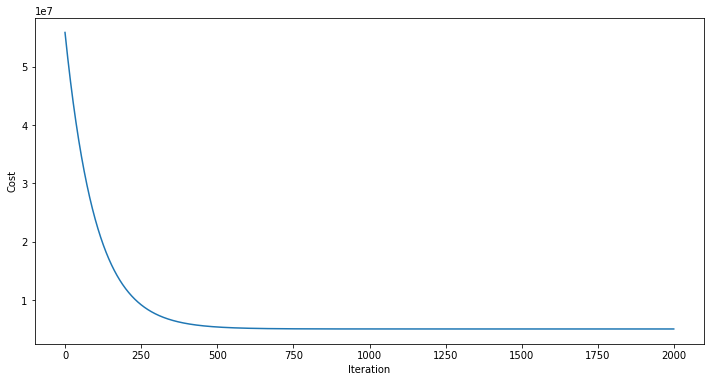

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

## Prediction

In [13]:
x_test = 1750

In [14]:
x_test_n = (x_test - mu) / sigma

In [15]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [16]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [17]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [18]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [19]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [20]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [21]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 1.13 $


In [77]:
X, Y = np.meshgrid(xn, y_pred)
X.shape
# print(X)

(30, 30)

In [78]:
# Z = X ** 2 + Y ** 2
def fun(x, y):
    return x**2 + y**2
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
Z.shape

(30, 30)

<ipython-input-79-9aba4c4a2957>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


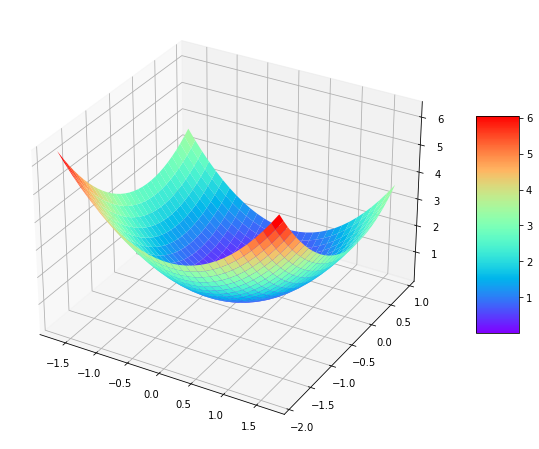

In [79]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [28]:
k=[]
vv=[]
theta = np.linspace(5,25,num=100)
c = np.ones_like(x)
for i in theta:
    a = 0.5*np.sum((i*c-y)**2)
    k.append(a)
    vv.append(i)

In [ ]:
plt.plot(v,k)
plt.xlabel('Theta_2')
plt.ylabel('cost Function  J(theta)');